In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd

In [40]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [42]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [44]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [45]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [46]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

      date  precipitation  tobs
2016-08-23           0.00  81.0
2016-08-23            NaN  80.0
2016-08-23           1.79  77.0
2016-08-23           0.05  80.0
2016-08-23           0.15  76.0
2016-08-23           0.70  74.0
2016-08-23           0.02  80.0
2016-08-24           0.08  79.0
2016-08-24           2.15  77.0
2016-08-24           2.28  80.0
2016-08-24            NaN  78.0
2016-08-24           1.45  74.0
2016-08-24           1.22  79.0
2016-08-24           2.15  76.0
2016-08-25           0.08  80.0
2016-08-25           0.00  81.0
2016-08-25           0.21  80.0
2016-08-25           0.06  80.0
2016-08-25           0.00  81.0
2016-08-25           0.11  77.0
2016-08-25           0.08  77.0
2016-08-26           0.03  78.0
2016-08-26           0.01  80.0
2016-08-26           0.00  84.0
2016-08-26           0.04  81.0
2016-08-26           0.02  81.0
2016-08-26           0.00  79.0
2016-08-27           0.18  73.0
2016-08-27           0.12  75.0
2016-08-27           0.00  77.0
2016-08-

Text(0.5, 1.0, 'Oahu')

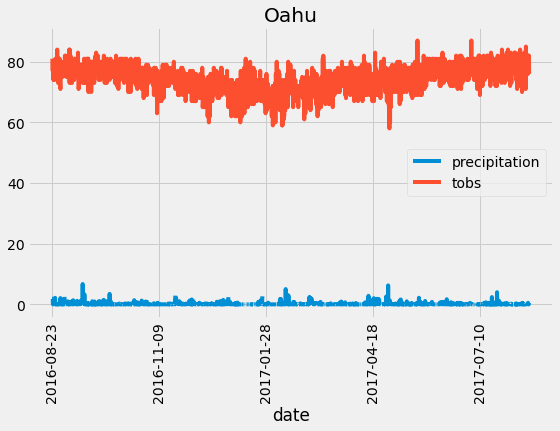

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
#prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp,Measurement.tobs).filter(Measurement.date>= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation','tobs'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(8,5))
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Oahu")

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation,tobs
count,2021.000000,2230.000000
mean,0.177279,74.590583
std,0.461190,4.611667
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


In [19]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [20]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

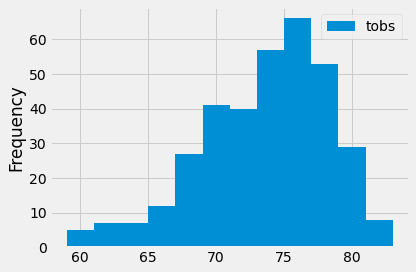

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
#print(df)
df.plot.hist(bins=12)
plt.tight_layout()

In [23]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge